In [1]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import os
os.environ ["KMP_DUPLICATE_LIB_OK"] ="TRUE"

In [2]:
n_train, n_test, num_inputs,batch_size = 20,100,200,5
true_w,true_b = torch.ones((num_inputs,1)) * 0.01,0.05
# 生成一个合成的线性回归数据集 20个数据点
train_data = d2l.synthetic_data(true_w,true_b,n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w,true_b,n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train = False)

In [3]:
def init_params():
    w = torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b = torch.zeros(1,requires_grad=True)
    return [w,b]

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [5]:
def train(lambd):
    w,b = init_params()
    # linreg计算线性回归的函数
    net,loss = lambda X:d2l.linreg(X,w,b),d2l.squared_loss
    num_epochs,lr = 100,0.003
    animator = d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',
                            xlim=[5,num_epochs],legend=['train','test'])
    
    for epoch in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X),y) + lambd*l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b], lr, batch_size)

        # 每五轮计算一次损失函数 并将结果添加到可视化动画对象animator中
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    
    print('w的L2范数是：',torch.norm(w).item())

w的L2范数是： 14.12696361541748


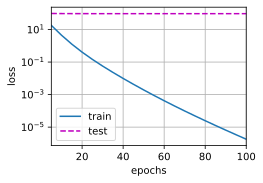

In [7]:
train(lambd = 0)

w的L2范数是： 0.35229769349098206


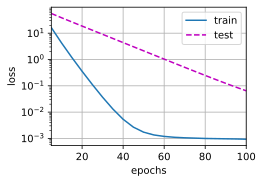

In [9]:
train(lambd = 3)

In [24]:
# L2正则化简洁实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_()
    
    loss = nn.MSELoss(reduction='mean')
    num_epochs,lr  = 200, 0.003
   # weight_decay 衰减强度为wd
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay':wd},
        {"params":net[0].bias}],lr = lr)
    
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            l = loss(net(X),y)
            l.mean().backward()
            # 迭代器更新参数
            trainer.step()
        # 每五轮更新一次参数
        if (epoch + 1) % 5 == 0:
           animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.848682403564453


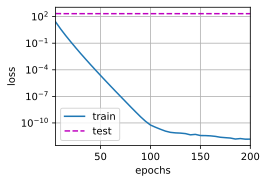

In [25]:
train_concise(0)

w的L2范数： 0.5559849143028259


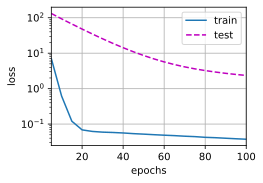

In [19]:
train_concise(3)